In [29]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt

In [30]:
author_marker_dict = {
    'Nietzsche': 'o',
    'Kafka': 's',
    'Austen': '^',
    'Hesse': 'D'
}
author_color_dict = {
    'Nietzsche': (0.2, 0.4, 0.8),
    'Kafka': (0.1, 0.7, 0.3),
    'Austen': (0.9, 0.6, 0.1),
    'Hesse': (0.9, 0.6, 0.3)
}

numerical_columns = [
    # 'node_count',
    # 'edge_count',
    'betweenness_standard_deviation',
    'average_degree',
    'median_degree',
    'diameter',
    'average_distance',
    'betweenness_average',
    'average_clustering'
]


In [31]:
df = pd.read_csv('output_isDigit.csv')
df = df[df['stopwords_removed'] == True]
df = df[df['author'] != 'ALL']
df = df[df['fixed_token_count'] == df['fixed_token_count'].max()]
print(df)

        author         title language  token_list_length  node_count  \
126     Austen          Anna       de              13062        3089   
127     Austen     Mansfield       de              13062        3518   
128      Hesse   Steppenwolf       de              13062        4554   
129      Hesse    Siddhartha       en              13062        2298   
130      Hesse        Demian       de              13062        3685   
131  Nietzsche      Jenseits       de              13062        4195   
132      Hesse        Demian       en              13062        2818   
133  Nietzsche       Goetzen       de              13062        4076   
134      Kafka       Amerika       en              13062        2743   
135      Kafka       Schloss       en              13062        2354   
136     Austen      Verstand       en              13062        2380   
137      Hesse   Steppenwolf       en              13062        3549   
138  Nietzsche   Zarathustra       en              13062        

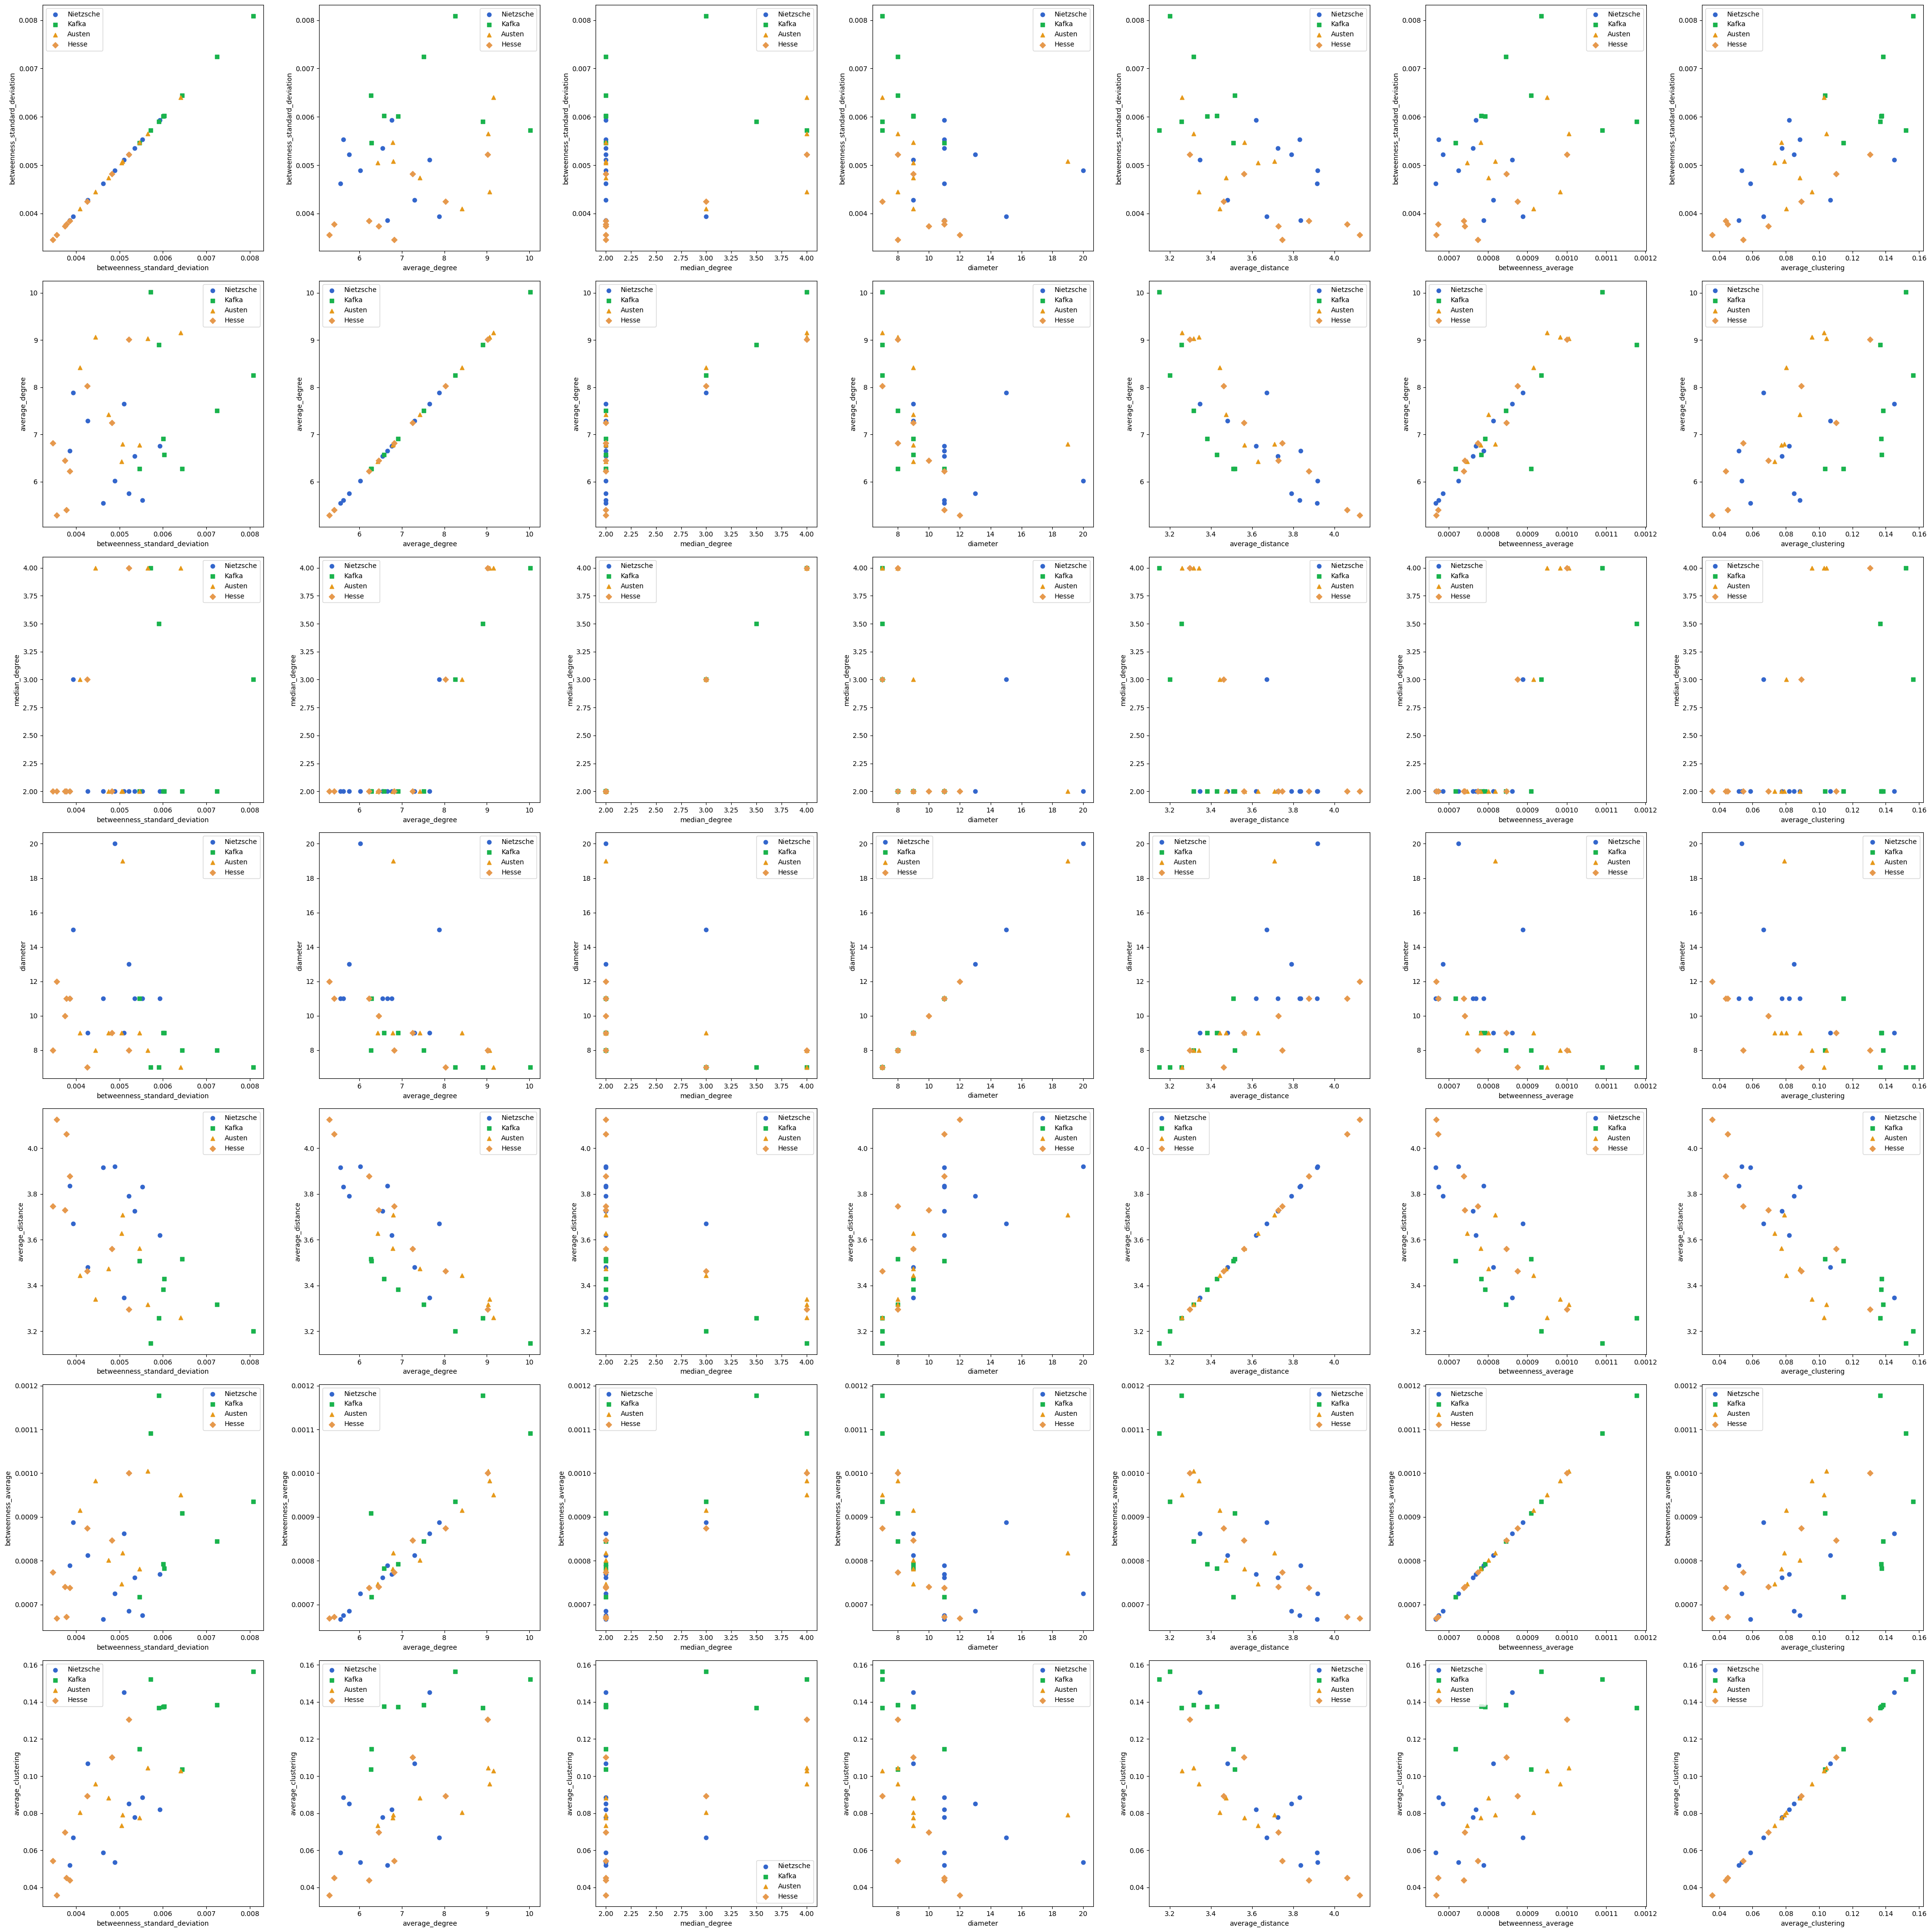

In [32]:
fig, axes = plt.subplots(len(numerical_columns), len(numerical_columns), figsize=(40, 40))


for i, column_i in enumerate(numerical_columns):
    for j, column_j in enumerate(numerical_columns):
        for author in author_marker_dict:
            # Unterschiedliche Farben für Englisch und Deutsch
            author_color = author_color_dict[author]
            author_color_en = author_color + (0.5,)  # heller (englisch)
            author_color_de = author_color + (1.0,)  # dunkler (deutsch)
            ax = axes[i, j]
            ax.set_xlabel(column_j)
            ax.set_ylabel(column_i)

            author_rows = df[df['author'] == author]

            author_rows_en = author_rows[author_rows['language'] == 'en']
            author_rows_de = author_rows[author_rows['language'] == 'de']

            # ax.scatter(author_rows_en[column_j], author_rows_en[column_i], marker=author_marker_dict[author], label = f'{author} (en)', color = author_color_en, s=50)

            # ax.scatter(author_rows_de[column_j], author_rows_de[column_i], marker=author_marker_dict[author], label = f'{author} (de)', color = author_color_de, s=200)
            # edgecolors='black' kann hinzugefügt werden



            ax.scatter(author_rows[column_j], author_rows[column_i], marker = author_marker_dict[author], label = f'{author}', color = author_color)

            ax.legend()
plt.tight_layout()
plt.savefig('scatter_matrix.png')
plt.show()